# ENCODINGS

## ASCII
ASCII is a 7-bit encoding standard which allows the representation of text using the integers 0-127.

Using the below integer array, convert the numbers to their corresponding ASCII characters to obtain a flag.

[99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]

In [16]:
ascii = [99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]
for i in ascii:
  print(chr(i),end='') 

crypto{ASCII_pr1nt4bl3}

## Hex

Included below is a flag encoded as a hex string. Decode this back into bytes to get the flag.

**`63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d`**


In [37]:
!pip install pwntools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
%env PWNLIB_NOTERM=true

env: PWNLIB_NOTERM=true


In [39]:
from pwnlib.util.fiddling import *
cipher = "63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d"
def uhex(cipher):
  return unhex(cipher).decode()
print(uhex(cipher))

crypto{You_will_be_working_with_hex_strings_a_lot}


## BASE64

Take the below hex string, decode it into bytes and then encode it into Base64.

**`72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf`**

In [20]:
cipher = "72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf"
def base64(cipher):
  return b64d(cipher.encode())

def base64e(cipher):
  return b64e(cipher)
print(base64e(unhex(cipher)))

crypto/Base+64+Encoding+is+Web+Safe/


## Bytes and Big Integers

Convert the following integer back into a message:

**`11515195063862318899931685488813747395775516287289682636499965282714637259206269`**

How it works:

```
message: HELLO
ascii bytes: [72, 69, 76, 76, 79]
hex bytes: [0x48, 0x45, 0x4c, 0x4c, 0x4f]
base-16: 0x48454c4c4f
base-10: 310400273487
```



In [21]:
!pip install pyCryptoDome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from Crypto.Util.number import bytes_to_long, long_to_bytes
cipher = 11515195063862318899931685488813747395775516287289682636499965282714637259206269
def bigint(cipher):
  return long_to_bytes(cipher).decode()
print(bigint(cipher))

crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}


## Encoding Challenge

Connect at `nc socket.cryptohack.org 13377`

Defining functions for decrypting data

In [23]:
def rot13(cipher):
  res = ""
  for i in cipher:
    if not i.isalpha():
      res += i
      continue
    rot = ord(i)+13 if ((ord(i)+13<=122)or(ord(i)+13<=90)) else ord(i)-13
    res += chr(rot)
  return res

def utf_8(cipher):
  res = ""
  for i in cipher:
    res += chr(i)
  return res

Calling functions according to the type of encryption

In [24]:
def decrypt(entype, cipher):
  if entype=="base64":
    return base64(cipher).decode()
  elif entype=="bigint":
    return bigint(int(cipher,base=16))
  elif entype=="rot13":
    return rot13(cipher)
  elif entype=="utf-8":
    return utf_8(cipher)
  elif entype=="hex":
    return uhex(cipher)

In [ ]:
import telnetlib
import json

HOST = "socket.cryptohack.org"
PORT = 13377

tn = telnetlib.Telnet(HOST, PORT)

def readline():
    return tn.read_until(b"\n")

def json_recv():
    line = readline()
    return json.loads(line.decode())

def json_send(hsh):
    request = json.dumps(hsh).encode()
    tn.write(request)
for i in range(100):
  received = json_recv()
  print(received)
  entype = received["type"]
  cipher = received["encoded"]
  plain = decrypt(entype, cipher)
  to_send = {"decoded": plain}
  print("plain: ",plain)
  json_send(to_send)

print(json_recv())


# XOR

## XOR Starter
Given the string "label", XOR each character with the integer 13. Convert these integers back to a string and submit the flag as crypto{new_string}.

In [26]:
!pip install pwntools
%env PWNLIB_NOTERM=true

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
env: PWNLIB_NOTERM=true


In [27]:
from pwnlib.util.fiddling import xor
plain = "label"
key = 13
xor(plain.encode(),key).decode()

'aloha'

## XOR Properties

Below is a series of outputs where three random keys have been XOR'd together and with the flag. Use the above properties to undo the encryption in the final line to obtain the flag.


```
KEY1 = a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313
KEY2 ^ KEY1 = 37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e
KEY2 ^ KEY3 = c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1
FLAG ^ KEY1 ^ KEY3 ^ KEY2 = 04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf
```

In [28]:
KEY1 = unhex("a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313")
KEY21 = unhex("37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e")
KEY23 = unhex("c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1")
FLAG_KEY132 = unhex("04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf")

from pwnlib.util.fiddling import xor
FLAG = xor(FLAG_KEY132,KEY1,KEY23).decode()
print(FLAG)

crypto{x0r_i5_ass0c1at1v3}


## Favorite Byte
I've hidden some data using XOR with a single byte, but that byte is a secret. Don't forget to decode from hex first.

**`73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d`**

In [29]:
from pwnlib.util.fiddling import xor

cipher = "73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d"
cipher = unhex(cipher)
for i in range(256):
  rslt = xor(cipher,i)
  if "crypt".encode() in rslt:
    print(rslt)

b'crypto{0x10_15_my_f4v0ur173_by7e}'


## You either know, XOR you don't

I've encrypted the flag with my secret key, you'll never be able to guess it. 

**`0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104 `**

In [30]:
from pwnlib.util.fiddling import xor

cipher = "0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104"
cipher = unhex(cipher)
print(xor("crypto{".encode(),cipher[:9]))

b'myXORke+y'


In [31]:
print(xor("myXORkey".encode(),cipher))

b'crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}'


## Lemur XOR

I've hidden two cool images by XOR with the same secret key so you can't see them!

Challenge files:
  - lemur.png: https://cryptohack.org/static/challenges/lemur_ed66878c338e662d3473f0d98eedbd0d.png
  - flag.png: https://cryptohack.org/static/challenges/flag_7ae18c704272532658c10b5faad06d74.png

In [32]:
!wget https://cryptohack.org/static/challenges/lemur_ed66878c338e662d3473f0d98eedbd0d.png
!wget https://cryptohack.org/static/challenges/flag_7ae18c704272532658c10b5faad06d74.png

--2022-11-28 22:23:01--  https://cryptohack.org/static/challenges/lemur_ed66878c338e662d3473f0d98eedbd0d.png
Resolving cryptohack.org (cryptohack.org)... 178.62.74.206
Connecting to cryptohack.org (cryptohack.org)|178.62.74.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572187 (559K) [image/png]
Saving to: ‘lemur_ed66878c338e662d3473f0d98eedbd0d.png.1’

lemur_ed66878c338e6 100%[===================>] 558.78K  --.-KB/s    in 0.04s   

2022-11-28 22:23:01 (13.9 MB/s) - ‘lemur_ed66878c338e662d3473f0d98eedbd0d.png.1’ saved [572187/572187]

--2022-11-28 22:23:01--  https://cryptohack.org/static/challenges/flag_7ae18c704272532658c10b5faad06d74.png
Resolving cryptohack.org (cryptohack.org)... 178.62.74.206
Connecting to cryptohack.org (cryptohack.org)|178.62.74.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572186 (559K) [image/png]
Saving to: ‘flag_7ae18c704272532658c10b5faad06d74.png.1’

flag_7ae18c70427253 100%[==================

In [33]:
from PIL import Image, ImageChops
im1 = Image.open('lemur_ed66878c338e662d3473f0d98eedbd0d.png')
im2 = Image.open('flag_7ae18c704272532658c10b5faad06d74.png')

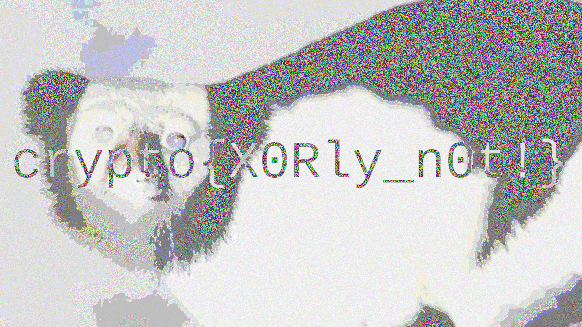

In [34]:
from pwnlib.util.fiddling import xor
def get_xor(image_1, image_2):
  i1 = ImageChops.invert(image_1)
  i2 = ImageChops.invert(image_2)
  return ImageChops.invert(ImageChops.add(ImageChops.subtract(i2, i1), ImageChops.subtract(i1, i2)))
display(get_xor(im1,im2))

# Data Formats

## Privacy-Enhanced Mail?

Extract the private key d as a decimal integer from this PEM-formatted RSA key.



In [35]:
!wget https://cryptohack.org/static/challenges/privacy_enhanced_mail_1f696c053d76a78c2c531bb013a92d4a.pem

--2022-11-28 22:23:02--  https://cryptohack.org/static/challenges/privacy_enhanced_mail_1f696c053d76a78c2c531bb013a92d4a.pem
Resolving cryptohack.org (cryptohack.org)... 178.62.74.206
Connecting to cryptohack.org (cryptohack.org)|178.62.74.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1675 (1.6K) [application/x-x509-ca-cert]
Saving to: ‘privacy_enhanced_mail_1f696c053d76a78c2c531bb013a92d4a.pem.1’

privacy_enhanced_ma 100%[===================>]   1.64K  --.-KB/s    in 0s      

2022-11-28 22:23:02 (486 MB/s) - ‘privacy_enhanced_mail_1f696c053d76a78c2c531bb013a92d4a.pem.1’ saved [1675/1675]



In [44]:
from Crypto.PublicKey import RSA
f = open('privacy_enhanced_mail_1f696c053d76a78c2c531bb013a92d4a.pem', 'rb')
key = RSA.importKey(f.read())
print(key.d)

15682700288056331364787171045819973654991149949197959929860861228180021707316851924456205543665565810892674190059831330231436970914474774562714945620519144389785158908994181951348846017432506464163564960993784254153395406799101314760033445065193429592512349952020982932218524462341002102063435489318813316464511621736943938440710470694912336237680219746204595128959161800595216366237538296447335375818871952520026993102148328897083547184286493241191505953601668858941129790966909236941127851370202421135897091086763569884760099112291072056970636380417349019579768748054760104838790424708988260443926906673795975104689
